# **Code**

### Imports ###

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import plotly.graph_objects as go
import math
import networkx as nx

### Function Definitions ###

In [2]:
def RunExponentialPopulations(N, alpha, years):
  Times = []
  Populations = []
  for i in np.arange(0,years+1,1):
    Times.append(i)
    Populations.append(round(N*math.exp(alpha*i)))

  df = pd.DataFrame({
    "Time (Years)": Times,
    "Population Size": Populations
  })

  fig = px.line(df, x="Time (Years)", y="Population Size", title="Exponential Growth")
  fig.add_hline(y=0, line_color="rgba(0,0,0,0)")
  fig.update_layout(yaxis_tickformat = ".")
  fig.show()

In [3]:
def RunLogPopulations(Ns, alpha, years, K):
  fig = go.Figure()
  if type(Ns) is int:
    Ns = [Ns]
  for N in Ns:
    Times = []
    Populations = []
    for i in np.arange(0,years+1,1):
      Times.append(i)
      Populations.append(round(K/(1+(K/N - 1)*math.exp(-alpha*i))))

    df = pd.DataFrame({
      "Time (Years)": Times,
      "Population Size": Populations
    })

    fig.add_traces(go.Scatter(x=Times, y=Populations, mode='lines',name="Starting Population of " + str(N)))
    #fig = px.line(df, x="Time (Years)", y="Population Size", title="Exponential Growth")
    fig.add_hline(y=0, line_color="rgba(0,0,0,0)")
  fig.show()

In [4]:
def RunPopulations_rK():
  fig = go.Figure()

  #Bacteria
  BacteriaTimes=[0]
  BacteriaPop = [1]

  for i in np.arange(0.25,10.25,0.25):
      BacteriaTimes.append(i)
      BacteriaPop.append(round(2*math.exp(math.log(8)*i)))

  fig.add_trace(
      go.Scatter(x=list(BacteriaTimes),
                y=list(BacteriaPop),
                name="E. coli Grown on Petri Dish",
                line=dict(color="#33CFA5")))


  ElephantTimes=[1960]
  ElephantPop = [50]

  for i in np.arange(1961,2025,1):
    ElephantTimes.append(i)
    ElephantPop.append(round(1.1*ElephantPop[-1]-round(5*math.exp((ElephantPop[-1]/30) - 30))))

  fig.add_trace(
      go.Scatter(x=list(ElephantTimes),
                y=ElephantPop,
                name="Elephant Populations within Kruger Nature Preserve",
                visible=False,
                line=dict(color="blue")))

  alpha=0.4
  beta=0.01
  delta=0.001
  gamma=0.1
  Predator=20
  Prey=120
  h=10**-2
  years=150

  PreyPop = [Prey]
  PredatorPop=[Predator]
  Times=[1970]
  for i in np.arange(0,3000,1):
    Time = 1970+i*(50/3000)
    Prey2 = Prey + 2*np.random.random()*5*h*(alpha*Prey - beta*Prey*Predator) #+ np.random.random()-0.5
    Predator2 = Predator + 2*np.random.random()*5*h*(delta*Prey*Predator - gamma*Predator)

    Prey = Prey2
    Predator = Predator2
    PreyPop.append(round(Prey))
    PredatorPop.append(round(Predator))
    Times.append(Time)

  fig.add_trace(
      go.Scatter(x=list(Times),
                y=PreyPop,
                name="Snowshoe Hare Population in Alaska",
                visible=False,
                line=dict(color="magenta")))

 # fig.add_trace(
 #     go.Scatter(x=list(Times),
 #               y=PredatorPop,
 #               name="Canada Lynx Population in Alaska",
 #               visible=False,
 #               line=dict(color="turquoise")))


  HumanTimes = [1500,1650,1700,1760,1804,1850,1900,1927,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025]
  HumanPop = [450000000,500000000,610000000,770000000,1000000000,1200000000,1600000000,2000000000,2493092848,2536927035,2584086339,2634106235,2685894860,2740213792,2795409994,2852618337,2911249671,2965950351,3015470894,3064869675,3123374315,3192807828,3264487339,3334533703,3404041125,3473412880,3545187251,3619491579,3694683794,3769847865,3844917680,3920805042,3996416096,4070735277,4144246377,4217863796,4292097502,4368539528,4447606236,4528777306,4612673421,4697327573,4782175519,4868943465,4958072838,5049746397,5141992542,5234431732,5327803110,5418735891,5505989816,5591544797,5675551255,5758878982,5842055734,5924787816,6007066690,6089006339,6171702993,6254936459,6337730342,6420361634,6503377772,6586970132,6671452015,6757308781,6844457662,6932766416,7021732148,7110923765,7201202485,7291793585,7381616244,7470491872,7558554526,7645617954,7729902781,7811293698,7887001292,7954448391,8021407192,8091734930,8161972572,8231613070]

  fig.add_trace(
      go.Scatter(x=HumanTimes,
                y=HumanPop,
                name="Human Population Worldwide",
                visible=False,
                line=dict(color="black")))

  HumanTimesPred = [2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050,2051,2052,2053,2054,2055,2056,2057,2058,2059,2060,2061,2062,2063,2064,2065,2066,2067,2068,2069,2070,2071,2072,2073,2074,2075,2076,2077,2078,2079,2080,2081,2082,2083,2084,2085,2086,2087,2088,2089,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100,2120]
  HumanPopPred = [8231613070,8300678395,8369094344,8436618886,8503285323,8569124911,8634119333,8698229812,8761449081,8823784909,8885210181,8945686614,9005152624,9063572926,9120928380,9177190203,9232281575,9286110371,9338661314,9389873693,9439639668,9487889604,9534545977,9579536043,9622824029,9664378587,9704192304,9742264515,9778614614,9813251659,9846237570,9877680392,9907637193,9936164379,9963337082,9989232292,10013916213,10037466600,10059950035,10081402737,10101849561,10121317107,10139808361,10157301941,10173782135,10189241959,10203681568,10217055169,10229327824,10240485056,10250496432,10259351432,10267045023,10273556322,10278887473,10283078029,10286161735,10288205050,10289247323,10289315244,10288456599,10286708360,10284111374,10280704572,10276518280,10271565070,10265861714,10259408375,10252184759,10244185837,10235403601,10225850874,10215549310,10204489862,10192689066,10180160751,10200000000]

  fig.add_trace(
      go.Scatter(x=HumanTimesPred,
                y=HumanPopPred,
                name="Predicted Human Population Worldwide",
                visible=False,
                line=dict(color="red",dash="dash")))


  fig.update_layout(
      updatemenus=[
          dict(
              active=0,
              buttons=list([
                  dict(label="Bacteria",
                      method="update",
                      args=[{"visible": [True, False, False, False, False]},
                            {"title": "E. coli Grown on Petri Dish",
                             "xaxis": {"title": "Time in Hours"},
                             "yaxis": {"title": "Population"},
                              "annotations": []}]),
                  dict(label="Elephants",
                      method="update",
                      args=[{"visible": [False, True, False, False, False]},
                            {"title": "Elephant Populations within Kruger Nature Preserve",
                             "xaxis": {"title": "Year"},
                             "yaxis": {"title": "Population"},
                              "annotations": []}]),
                  dict(label="Hares",
                      method="update",
                      args=[{"visible": [False, False, True, False, False]},
                            {"title": "Hares in Alaskan Wilderness, subject to Predation by Lynx",
                             "xaxis": {"title": "Year"},
                             "yaxis": {"title": "Population"},
                              "annotations": []}]),
                  dict(label="Humans",
                      method="update",
                      args=[{"visible": [False, False, False, True, True]},
                            {"title": "Human Population Worldwide",
                             "xaxis": {"title": "Year"},
                             "yaxis": {"title": "Population"},
                              "annotations": []}]),
              ]),
          )
      ])

  # Set title
  fig.update_layout(title_text="E. coli Grown on Petri Dish")
  fig.update_xaxes(title_text="Time in Hours")
  fig.update_yaxes(title_text="Population")
  fig.add_hline(y=0, line_color="rgba(0,0,0,0)")
  fig.show()

In [5]:
def LotkaVolterra(alpha=0.4,beta=0.01,delta=0.001,gamma=0.1,Predator=50,Prey=120,h=10**-2,years=150):
  PreyPop = [Prey]
  PredatorPop=[Predator]
  Times=[0]
  for i in np.arange(0,round(years/h),1):
    Time = h + i*h
    Prey2 = Prey + h*(alpha*Prey - beta*Prey*Predator)
    Predator2 = Predator + h*(delta*Prey*Predator - gamma*Predator)

    Prey = Prey2
    Predator = Predator2
    PreyPop.append(round(Prey))
    PredatorPop.append(round(Predator))
    Times.append(Time)

  fig = go.Figure()
  fig.add_traces(go.Scatter(x=Times, y=PreyPop, mode='lines',name="Prey Population"))
  fig.add_traces(go.Scatter(x=Times, y=PredatorPop, mode='lines',name="Predator Population"))
  fig.add_hline(y=0, line_color="rgba(0,0,0,0)")
  fig.show()

In [6]:
def LotkaVolterraStochastic(alpha=0.4,beta=0.01,delta=0.001,gamma_prey=0.1,gamma_pred = 0.15,carrying_capacity_prey=2000,carrying_capacity_predator=30,Condition="None",ConditionParam=0,PredPrey50ChanceFood = 2,Predator=20,Prey=150,h=10**-2,years=400):
  n_factor_prey = carrying_capacity_prey**(1/2)
  n_factor_predator = carrying_capacity_predator**(1/2)
  PreyPop = [Prey]
  PredatorPop=[Predator]
  Times=[0]
  for i in np.arange(0,round(years/h),1):
    Time = h + i*h
    r = np.random.random()

    #Update
    PreyDelta = h*(alpha*Prey - beta*Prey*Predator-gamma_prey*Prey-5*math.exp((Prey/n_factor_prey) - n_factor_prey))
    PredDelta = h*(delta*Prey*Predator - gamma_pred*Predator - 10*(PredPrey50ChanceFood**2/(PredPrey50ChanceFood**2+((0.01+Prey)/(0.01+Predator))**2))-5*math.exp((Predator/n_factor_prey) - n_factor_prey))

    Prey += int(PreyDelta)
    Predator += int(PredDelta)

    if PreyDelta > 0 and PreyDelta%1 > r:
      Prey = Prey + 1
    if PreyDelta < 0 and -PreyDelta%1 > r:
      Prey = Prey - 1
    if PredDelta > 0 and PredDelta%1 > r:
      Predator = Predator + 1
    if PredDelta < 0 and -PredDelta%1 > r:
      Predator = Predator - 1

    #Inflow, Outflow
    if (1-r) < 0.001:
      Prey += 1
      Predator += 1
    Prey = Prey - round(0.002*(np.random.random())*Prey)
    Predator = Predator - round(0.002*(np.random.random())*Predator)

    #Negatives Correction
    if Prey < 0:
      Prey = 0
    if Predator < 0:
      Predator = 0

    PreyPop.append(Prey)
    PredatorPop.append(Predator)
    Times.append(Time)


    #Condition Updates
    if 0 < Time-(years/2) <= h:
      if Condition == "Sudden Predator Influx":
        Predator += ConditionParam
      if Condition == "Sudden Prey Influx":
        Prey += ConditionParam
      if Condition == "Prey Disease":
        gamma_prey = gamma_prey*ConditionParam
      if Condition == "Predator Disease":
        gamma_pred = gamma_pred*ConditionParam
      if Condition == "Prey Fecundity":
        alpha = alpha*ConditionParam
      if Condition == "Predator Fecundity":
        delta = delta*ConditionParam
      if Condition == "Predator Food Requirement":
        PredPrey50ChanceFood = PredPrey50ChanceFood*ConditionParam

    if -h< Time-(years/2) < years*0.75:
      if Condition == "Gradual Predator Influx":
        Predator += round(np.random.random()+ConditionParam-0.5)
      if Condition == "Gradual Prey Influx":
        Prey += round(np.random.random()+ConditionParam-0.5)



  fig = go.Figure()
  fig.add_traces(go.Scatter(x=Times, y=PreyPop, mode='lines',name="Prey Population"))
  fig.add_traces(go.Scatter(x=Times, y=PredatorPop, mode='lines',name="Predator Population"))
  if Condition != "None":
    fig.add_vline(x=years/2, line_width=2, line_dash="dash", line_color="black")
  fig.add_hline(y=0, line_color="rgba(0,0,0,0)")
  fig.show()

In [7]:
def FourPests(state="Initial",carrying_capacity_locust=200000000000,carrying_capacity_sparrow=2000000000,Condition="None",ConditionParam=0,h=10**-2,years=80):

  Grain = 10000000
  Locust = 500000
  Sparrow = 2000000
  gamma = 0.2
  a = 4
  c=0.2

  n_factor_sparrow = carrying_capacity_sparrow**(1/2)
  n_factor_locust = carrying_capacity_locust**(1/2)

  LocustPop = [Locust]
  SparrowPop= [Sparrow]
  GrainPop = [Grain]
  Times=[1900]
  for i in np.arange(0,round(years/h),1):
    Time = 1900 + h + i*h
    r = np.random.random()
    c = 0.2*(Time-950)/950
    #Update
    GrainDelta = 3*h*(c*Grain - (a/4)*(10**-7)*Grain*Locust - (10**-7)*Grain*Sparrow)
    LocustDelta = 3*h*((a*(10**-8))*Grain*Locust - (10**-7)*Locust*Sparrow - gamma*Locust - 5*math.exp((Locust/n_factor_locust) - n_factor_locust))
    SparrowDelta = 3*h*((0.1*(10**-7))*Grain*Sparrow + (0.2*(10**-7))*Locust*Sparrow - 0.1*Sparrow - 5*math.exp((Sparrow/n_factor_sparrow) - n_factor_sparrow))

    Grain += int(GrainDelta)
    Locust += int(LocustDelta)
    Sparrow += int(SparrowDelta)

    if GrainDelta > 0 and GrainDelta%1 > r:
      Grain = Grain + 1
    if GrainDelta < 0 and -GrainDelta%1 > r:
      Grain = Grain - 1
    if LocustDelta > 0 and LocustDelta%1 > r:
      Locust = Locust + 1
    if LocustDelta < 0 and -LocustDelta%1 > r:
      Locust = Locust - 1
    if SparrowDelta > 0 and SparrowDelta%1 > r:
      Sparrow = Sparrow + 1
    if SparrowDelta < 0 and -SparrowDelta%1 > r:
      Sparrow = Sparrow - 1

    #Inflow, Outflow
    if (1-r) < 0.001:
      Sparrow += 1
      Locust += 1
      Grain += 1

    #Negatives Correction
    if Grain < 0:
      Grain = 0
    if Locust < 0:
      Locust = 0
    if Sparrow < 0:
      Sparrow = 0

    if (1958 < Time <= 1962) and (state=="Extermination"):
      Sparrow += ((1963 - Time)**2)*np.random.random()*(-600)
      gamma = 0.12
      a = 8

    if Time > 1965:
      Grain += 2000

    Grain += (Time**3)/(2000000)
    GrainPop.append(Grain)
    LocustPop.append(Locust)
    SparrowPop.append(Sparrow)
    Times.append(Time)


  fig = go.Figure()
  fig.add_traces(go.Scatter(x=Times, y=GrainPop, mode='lines',name="Grain Population"))
  fig.add_traces(go.Scatter(x=Times, y=LocustPop, mode='lines',name="Locust Population"))
  fig.add_traces(go.Scatter(x=Times, y=SparrowPop, mode='lines',name="Sparrow Population"))
  fig.add_hline(y=1, line_color="rgba(0,0,0,0)")
  #fig.update_yaxes(type="log")
  fig.show()

In [8]:
def NewZealand(log=False,carrying_capacity_rabbit=1000000,carrying_capacity_stoat=100000,Condition="None",ConditionParam=0,h=10**-2,years=320):

  Plant = 5500000
  Bird = 500000
  Rabbit = 0
  Stoat = 0

  a = 1.2
  n_factor_rabbit = carrying_capacity_rabbit**(1/2)
  n_factor_stoat = carrying_capacity_stoat**(1/2)

  PlantPop = [Plant]
  BirdPop= [Bird]
  RabbitPop = [Rabbit]
  StoatPop = [Stoat]
  Times=[1700]
  for i in np.arange(0,round(years/h),1):
    Time = 1700 + h + i*h
    r = np.random.random()

    #Update
    PlantDelta = h*(0.05*Plant - (10**-7)*Plant*Bird - (10**-7)*Plant*Rabbit)
    BirdDelta = h*(a*(10**-8)*Plant*Bird - (3*(10**-6))*Stoat*Bird - 0.06*Bird)
    RabbitDelta = h*(0.01*Rabbit + 5*(10**-8)*Plant*Rabbit - (10**-7)*Stoat*Rabbit  - 0.1*Rabbit  - 5*math.exp((Rabbit/n_factor_rabbit) - n_factor_rabbit)  )
    StoatDelta = h*((10**-7)*Stoat*Bird + ((10**-7))*Stoat*Rabbit  - 0.05*Stoat  - 5*math.exp((Stoat/n_factor_stoat) - n_factor_stoat) )

    Plant += int(PlantDelta)
    Bird += int(BirdDelta)
    Rabbit += int(RabbitDelta)
    Stoat += int(StoatDelta)

    if PlantDelta > 0 and PlantDelta%1 > r:
      Plant = Plant + 1
    if PlantDelta < 0 and -PlantDelta%1 > r:
      Plant = Plant - 1
    if BirdDelta > 0 and BirdDelta%1 > r:
      Bird = Bird + 1
    if BirdDelta < 0 and -BirdDelta%1 > r:
      Bird = Bird - 1
    if RabbitDelta > 0 and RabbitDelta%1 > r:
      Rabbit = Rabbit + 1
    if RabbitDelta < 0 and -RabbitDelta%1 > r:
      Rabbit = Rabbit - 1
    if StoatDelta > 0 and StoatDelta%1 > r:
      Stoat = Stoat + 1
    if StoatDelta < 0 and -StoatDelta%1 > r:
      Stoat = Stoat - 1

    if (1980 < Time) and (Time%1 < 0.015):
      Rabbit += -7000*np.random.random()*(Time-1940)/40
      a = 8

    #Negatives Correction
    if Plant < 0:
      Plant = 0
    if Bird < 0:
      Bird = 0
    if Rabbit < 0:
      Rabbit = 0
    if Stoat < 0:
      Stoat = 0

    if 1770 < Time < 1771.2:
      Rabbit += 50
      a = 1.3

    if 1820 < Time < 1821:
      a = 3

    if 1850 < Time < 1860:
      Rabbit += 50
      a = 7


    if 1860 < Time < 1870:
      Stoat += 50
      a = 4

    if 1870 < Time < 1880:
      Rabbit += 100
      a = 7

    if 1900 < Time < 1901:
      a = 5

    if 1930 < Time < 1931:
      a = 10


    #if (1958 < Time <= 1962) and (state=="Extermination"):
    #  Sparrow += ((1963 - Time)**2)*np.random.random()*(-600)
    #  gamma = 0.12
    #  a = 8

    PlantPop.append(Plant)
    BirdPop.append(Bird)
    RabbitPop.append(Rabbit)
    StoatPop.append(Stoat)

    Times.append(Time)


  fig = go.Figure()
  fig.add_traces(go.Scatter(x=Times, y=PlantPop, mode='lines',name="Native Plant Population"))
  fig.add_traces(go.Scatter(x=Times, y=RabbitPop, mode='lines',name="Invasive European Rabbit Population"))
  fig.add_traces(go.Scatter(x=Times, y=StoatPop, mode='lines',name="Invasive Stoat Population"))
  fig.add_traces(go.Scatter(x=Times, y=BirdPop, mode='lines',name="Native Bird Population"))
  fig.add_hline(y=0.1, line_color="rgba(0,0,0,0)")

  if log == True:
    fig.update_yaxes(type="log")
  fig.show()

In [68]:
def Smiley():
  fig = go.Figure()

  fig.add_shape(type="circle",
      xref="x", yref="y",
      x0=-0.2, y0=-0.2, x1=0.2, y1=0.2,
      fillcolor="lime", line_width=0
  )
  fig.add_shape(type="circle",
      xref="x", yref="y",
      x0=-0.1, y0=0.04, x1=-0.04, y1=0.1,
      fillcolor="black", line_color="black"
  )
  fig.add_shape(type="circle",
      xref="x", yref="y",
      x0=0.04, y0=0.04, x1=0.1, y1=0.1,
      fillcolor="black", line_color="black"
  )
  fig.add_shape(type="path",
      path="M -0.12 -0.06 Q 0 -0.16 0.12 -0.06",
      line_color="black", line_width=3
  )

  # Update layout for better visualization
  fig.update_layout(
      xaxis=dict(showgrid=False, zeroline=False, showticklabels=False, range=[-1.6, 1.6]),
      yaxis=dict(showgrid=False, zeroline=False, showticklabels=False, range=[-0.2, 0.2]),
      plot_bgcolor="white",
      showlegend=False,
      title=""
  )
  fig.update_layout(
    autosize=False,
    width=1200,
    height=300,
  )
  # Show the figure
  fig.show()

# **Start**

## **Part 1: Setup**

Read the setup instructions and attempt to run the below cell. It should produce a smiley face. If not, ask your teacher for help before continuing.

In [69]:
#Run Smiley
Smiley()

## **Part 2: A Review of Exponential and Logistic Growth Models**

### **Populations**

The population of one species depends on itself and its environment. For a population to grow, it needs to be able to support itself with the resources it has and produce more individuals faster than they die and are eaten. In this activity, you will be analyzing how various factors impact the growth of populations, building on prior knowledge to now talk about how different populations affect each other.

Predator-prey dynamics are one of the most vital to understanding food chains, food webs, and entire ecosystems. What happens as the number of predators increases? How do changing environments affect all of the organisms that live in them? In ecology, we study these questions, often using simulations to better understand how these various effects impact each other.

Lets take a look at the simplest population model, exponential growth.

A single population grows based on the number of individuals in it. The more individuals, the faster it grows. If a pair of rabbits can produce one baby every year, as the population grows more babies are produced each year. This can be modeled with this equation:

$\LARGE \frac{dN}{dt} = r N$      

Where dN/dt is the derivative (the rate of change of one variable as another changes, the slope) of the population as time changes, r is the growth rate of the population, and N is the population.

This differential equation above (an equation with derivatives, rates of change, in them) can be solved as:

$\LARGE N(t) = N_{i} e^{r t}$

Where $N_i$ is the inital population.

Let's see what this type of population growth will look like. We will start with a population of 2 rabbits. The code below will run a simulation, starting with those two rabbits, and output the population of rabbits over time.

In the code cell below, the function "RunExponentialPopulations" will take a starting population of 2 rabbits and predict the population of rabbits over 20 years with a 10% growth rate.

*Make a prediction about what will happen to the rabbit population as time goes on. Run the cell below and write down your observations.*

In [9]:
RunExponentialPopulations(2,0.1,20) #2 individuals initially, 10% growth a year, 20 years

Now, this looks good! We start with two rabbits and end up with more rabbits. But, what happens over longer periods of time?

*Run the cell below to see what happens over 300 years of exponential growth.*

In [10]:
RunExponentialPopulations(2,0.1,300) #2 individuals initially, approximately 10% growth a year, 300 years

In just 300 years of 10% yearly growth, we reach a rabbit population of nearly 20 trillion! Clearly our model needs some other factors in order to be realistic.

In reality, populations don't just go up. Populations can run out of space, they can run out of food, etc.. These factors that prevent populations from getting too large and depend on the size of the population are called **density-dependent factors.** They limit the size of a population to a maximum, a ceiling for beyond which the population cannot be sustained by its environment. This is called the **carrying capacity** of that population.

We can model this maximum with a slight change to our equations. We can add a penalty, where if our population gets larger than its carrying capacity, it will decrease. Essentially, our population grows exponentially until, as it gets closer to its carrying capacity, its growth slows down as other resource-related factors matter more and more. If $K$ is our carrying capacity, this ppenalty can be modeled as:

$\LARGE \frac{dN}{dt} =  r_{max}N\left(\frac{(K-N)}{K}\right)$

When the population, $x$, is small, it increases exponentially. As the population gets bigger, the fraction in front of the x gets smaller as growth slows down.

Let's see what happens to our rabbit population now if we assume a carrying capacity of 100 rabbits!

*Run the code cell below.*


In [11]:
RunLogPopulations(2,0.1,300,100) #2 individuals initially, approximately 10% growth a year, 300 years, Carrying Capacity of 100

Now, our population starts with an exponential increase, increasing at a maximum rate when the population is at 50 (half the carrying capacity) before slowing down in growth as it gets closer to the carrying capacity of 100 (the maximum sustainable population). If we try a few other values, they all reach this carrying capacity!

In [12]:
RunLogPopulations([2,10,50,90,120,170],0.1,150,100) #Multiple Starting Populations

The model above keeps the population from ballooning to extreme levels and shows growth, but real populations do have some change. **Populations are always in flux**, growing and shrinking as various **limiting factors**, both **density-dependent** and **density-independent**, affect how our population can grow. Our previous models make some big assumptions and avoid tackling some big problems. Some of the biggest of these are that our models don't account for how populations decline, where this carrying capacity comes from, or how populations interact with each other. If an organism is not limited by density-dependent factors, then we can use an exponential growth model. If we know they have a carrying capacity, and we know that capacity, we can use a logistic model.

In ecology, populations that can be modeled accurately using exponential growth models often share certain characteristics. **They are controlled most heavily by density-independent factors, reproduce rapidly, and can go through "boom and bust" cycles where they show rapid exponential growth followed by rapid decays.** They also often fit into the bucket of "Type III" survivorship curves, having lots of offspring in the hope that some survive to make use of times when resources are plentiful. These populations are called **r-strategists** (or r-selected), similar to the "r" in the exponential growth equation.

**Populations that can be modeled well using logistic growth models, having very few young, being controlled heavily by density-dependent factors, and stabilizing arround carrying capacities.** They also often fit into the bucket of "Type I" survivorship curves, having very few offspring and depending on more stable environments. These populations are called **K-strategists** (or K-selected), similar to the "K" for carrying capacities in the logistic growth equation.

r and K strategies do not match 100% with exponential and logistic growth curves. The terms r and K focus more on how these populations reproduce rather than what the specific growth curve will look like.

Take a look at the below graphs for some populations. For the **bacteria**, **elephant**, and **hare populations**, make determinations for whether they are **r** or **K** strategists based on the population curves and your knowledge of the species.


In [13]:
RunPopulations_rK()

## **Part 3: Lotka-Volterra Model**

Populations growth comes from "births" (whether that be binary fission, live birth, or eggs hatching) and population decline comes from deaths, so with B being the birth rate and D being the death rate, we can say that:

$\LARGE \frac{dN}{dt} = B - D$

Our questions now depend on what factors lead to births and to deaths.

Let's also use two populations now to see how they interact with each other, one for prey (let's call the population of prey x) and one for predators (y):

$\LARGE \frac{dx}{dt} = B_x - D_x$

$\LARGE \frac{dy}{dt} = B_y - D_y$

Without looking into what the prey eat or what eats or decomposes the predators, we can at least get a sense for how two trophic levels interact.

The births of the prey we could model exponentially, in the same way as our first model, with deaths from being eaten by predators bringing the prey population down. The death rate will depend on both how much prey there is and how many predators, as they need to meet in order for an individual to be eaten:

$\LARGE \frac{dx}{dt} = \alpha x - \beta x y$

Where $\alpha$ is the exponential growth rate for the prey and $\beta$ describes how good the predators are at hunting prey.

We can do a similar thing with predators, where they grow by eating prey and die proportionally to their population (exponentially):

$\LARGE \frac{dy}{dt} = -\gamma y + \delta xy$

Where $\gamma$ is the exponential death rate and $\delta$ describes how much the predator population grows by hunting.

These equations above are called the **Lotka-Volterra** equations, and we can use them to understand how predator and prey populations interact with each other.

Let's see what happens when we run a simulation using these equations:

*Run the cell below with the preset values.*

In [14]:
LotkaVolterra(alpha=0.4,beta=0.01,delta=0.001,gamma=0.1,Predator=30,Prey=120,years=150)

These equations lead to an oscillating pattern. At the start, few predators allows the prey population to rise. As the prey population rises, more food is available to the predators, allowing their population to grow. As more predators are around to eat the prey, the prey population shrinks. With less food available, the predator population shrinks after this.

With a few more added terms to account for some randomness, some migration both into and out of the populations, and a death term for the prey, we get the simulation below.

*Run the "LotkaVolterraStochastic" function below a few times to get a feel for how predator and prey populations interact.*

In [15]:
LotkaVolterraStochastic(years=200)

Now that we have a model that can show how two populations interact, lets put it to use to make some predictions!

In the function below, two **inputs**, **Condition** and **ConditionParam**, are set up. These two can be used to model a few different situations for the simulation, changing the parameters of the model at the half-way time point.

The conditions allowed include strings from the following list:



*   "Sudden Predator Influx"
*   "Sudden Prey Influx"
*   "Prey Disease" (Increases prey death rate)   
*   "Predator Disease" (Increases predator death rate)  
*   "Prey Fecundity"  (Prey growth rate)  
*   "Predator Fecundity"  (Predator growth rate)  
*   "Predator Food Requirement" (How much food a predator needs to survive)  
*   "Gradual Predator Influx"  
*   "Gradual Prey Influx"  
<br>
<br>

Condition Param lets you set the strength of the condition. For any of the influx conditions, it specifies how many prey or predator organisms you wish to add. Influx parameters can be made negative to remove predators or prey. For the other conditions, setting ConditionParam to 1 keeps the original setting, setting it to 0.5 halves it and setting it to 2 doubles it.   

*If you wish to see how these parameters directly affect the code, feel free to look under "Function Definitions" at the top under the function "LotkaVolterraStochastic".*  

<br>

At the half-way point in time the condition is introduced (marked with a dotted line). The condition "Sudden Predator Influx" has already been loaded.

*Test out a couple conditions and condition parameters. Due to randomness, run the function a couple times each time you choose new parameters to get a better sense for how the parameter actually impacts the graph.*



In [16]:
LotkaVolterraStochastic(Condition="Sudden Predator Influx",ConditionParam=50,Predator=40,Prey=150,years=200)

## **Part 4: Case Studies**

### **Four Evils**

*The Four Evils Campaign* (除四害) was a major part of Maoist China's *Great Leap Forward*, the second of several five year plans led by the Chinese Communist Party (CCP) to industrialize China rapidly, with a heavy focus on bettering agriculture.

The Four Evils Campaign recognized four pests that terrorized China: mosquitoes, flys, rats, and **sparrows**. The goal was simple: kill these four pests as quickly and efficiently as possible to prevent further spread of diseases, nuisances, and to prevent crop loss.

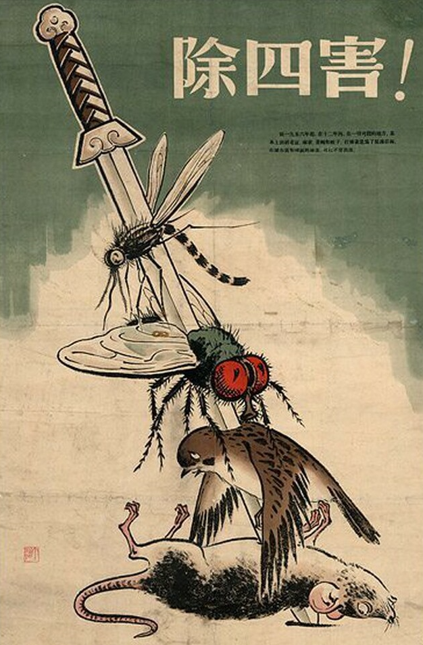

The government had recognized that sparrows were eating grain crops across the country, decimating yields, marking their addition to the list of four pests. They encouraged individuals to kill any sparrows they saw. Using slingshots, disrupting nests, killing chicks, and breaking eggs, citizens across China participated in a mass mobilization to kill sparrows to protect crops.

<br>

Unfortunately, the Chinese government neglected to consider the ecological ramifications of their actions. Sparrows do not just eat grain, but they also eat plenty of insects that also eat grain crops. **locusts** are r-selected species, growing rapidly in number if the conditions around them allow them to do so, swarming fields and harming crops. While sparrows do eat grain, they also eat locusts, preventing those locusts from eating grain crops.

From 1958-1962, sparrow populations declined dramatically as they were killed off.

*Run the cell below to see grain, sparrow, and locust populations across time. This plot is not accurate to actual population figures (fluctuations exaggerated for the simulation) and is based on biomass, not number of individuals.*

In [17]:
FourPests(state = "Extermination")

### **Rabbits in New Zealand**

New Zealand and Australia, due to their **biogeography**, are host to very unique ecosystems. In New Zealand, thousands of plant and hundreds of bird species are endemic to the islands, with natural selection and ecological pressures forming delicate balances over time. Little interaction has occurred between these ecosystems and those of the rest of the world.

With the arrival of European colonists, many new species were introduced to New Zealand, from goats and cattle for agriculture to **European rabbits**, first introduced to the main island in the 1830s, brought for meat and fur.

Over decades, these rabbits spread across the island. With no natural predators present, their populations grew rapidly, quickly decimating both agricultural crops and native plant populations. In order to cull the growing rabbit populations, **stoats** (mustelids, like weasels or otters) were introduced to hunt rabbits.

As stoats were introduced, they ate more native birds than rabbits, quickly decimating already declining bird populations. As most native bird species did not have many if any natural predators, they had not adapted any defense mechanisms or behaviors to combat predation.

Stoats and rabbits are both now seen as invasive species. In order to combat rabbit populations, pathogens have been released (both legally and illegally) to kill off populations, and yearly hunting competitions are held with thousands of rabbits killed each year (seeing some positive effects, visible at the most recent end of the graph).

*Run the cell below to visualize simulated plant, rabbit, stoat, and bird populations over time. In order to see stoat, bird, and rabbit populations more clearly, you many want to hide plant populations by clicking "Native Plant Population" on the right. You can also view the below plot on a logarithmic scale by setting "log" to True in the function below.*

In [18]:
NewZealand(log=False)

### **Choose Your Own!**

Now that we have seen how ecosystems can be disrupted through both the introduction of and removal of species, its time to see how our study of ecology can be used to describe and solve current ecological problems.

Choose a case study from the below list. **You must choose one different from everyone else at your table**. Research the particular species/event/phenomenon and how a certain ecosystem was or is being impacted.

On your handout, write the phenomenon you chose, draw a simple food web illustrating it, and describe the population dynamics that occured. If it details an ongoing problem, look into how ecology can be used to solve that problem. Some vocabulary from this unit is provided (listed at the bottom of this notebook) to help you.

Each phenomenon has a link attached to get you started, but please feel free to conduct further research! Have fun with it!

You may also choose one outside of this list with permission from your teacher.

# **List of Phenomena**



* [Sea Urchins, Kelp, and Otters on the Northern California Coast](https://illinois.pbslearningmedia.org/resource/urchin-and-otter/urchin-and-otter/)
* [Cane Toads in Australia](https://www.abc.net.au/news/2022-01-18/cane-toad-bust-in-queensland-to-curb-spread-of-invasive-pest/100761278)
  * [Additional Info](https://conbio.onlinelibrary.wiley.com/doi/10.1111/csp2.296)
* [Lionfish in the Caribbean](https://www.theguardian.com/global-development/2023/sep/26/off-the-reef-and-on-the-menu-fishers-in-the-caribbean-wage-war-on-the-invasive-lionfish)
* [Harmful Algal Blooms in Lake Erie](https://www.fondriest.com/news/lake-erie-food-web-cyanobacteria-bloom-effects.htm)
* [Rats (or the lack thereof) in Alberta (first half of article) OR Lake Trout in Yellowstone (second half)](https://www.mountainnaturepodcast.com/074-keepiing-alberta-rat-free-and-how-adding-one-non-native-fish-to-yellowstone-caused-a-food-web-to-collapse/)
* [Wolves, Elk, and Landslides in Yellowstone](https://www.yellowstonepark.com/things-to-do/wildlife/wolf-reintroduction-changes-ecosystem/)
* [Ochre Sea Stars and California Mussels, Sea Star Wasting Disease](https://www.nps.gov/articles/000/on-the-edge-the-curious-lives-of-intertidal-organisms-and-how-we-monitor-them.htm)
* [Invasive Carp in the Mississippi](https://www.nps.gov/miss/learn/nature/ascarpover.htm)
* [Zebra Mussels in Lake Michigan](https://www.ijc.org/en/how-do-mussels-and-nutrient-runoff-impact-lake-michigans-food-web)
* [American Bison as a food source for Native Americans, (the Bison Genocide)](https://libguides.sdstate.edu/c.php?g=1358402&p=10030696)
* [Kudzu in the United States](https://science.howstuffworks.com/life/botany/kudzu.htm)
* [Cats in New Zealand](https://www.theguardian.com/world/2023/aug/19/bird-killing-machines-new-zealand-cools-on-cats-to-protect-native-wildlife)
* [Elephants, Acacia, and Competing Ants](https://www.scientificamerican.com/article/of-ants-elephants-and-acacias/)


# **Vocabulary List**

* Trophic Levels
* Consumer
* Producer
* Prey
* Predator
* Decomposer
* Energy
* Biomass
* Keystone Species
* 10% Rule
* Conservation of Energy
* Water, Carbon, Phosphorous, Nitrogen, and Salt Cycles
* Nutrients
* Pollution
* Runoff

<br>

* Population
* Species
* Community
* Biome
* Biogeography
* Ecosystem
* Environment

<br>

* Limiting Factors
* Density-Dependent
* Density-Independent
* Abiotic Factor
* Biotic Factor
* r-Selection
* K-Selection
* Symbiosis
* Predation
* Competition
* Mutualism
* Parasitism
* Commensalism

<br>

* Fitness
* Trait
* Selection
* Evolve
* Behavior


